In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier



In [52]:
data=pd.read_csv("C:/Users/varsh/Downloads/archive/covtype.csv")
data.shape

(581012, 55)

In [54]:
data.columns.tolist()


['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Cover_Type']

In [58]:
import os
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads", "sampled_data.csv")

df_random = data.sample(n=4000, random_state=42)

df_random.to_csv(downloads_path, index=False)

print(f"Sampled data saved to: {downloads_path}")


Sampled data saved to: C:\Users\varsh\Downloads\sampled_data.csv


In [ ]:
df_random.shape

(4000, 55)

Soil Type counts:
Soil_Type29    795
Soil_Type23    390
Soil_Type32    351
Soil_Type33    300
Soil_Type10    229
Soil_Type22    219
Soil_Type12    209
Soil_Type31    197
Soil_Type30    193
Soil_Type24    169
Soil_Type13    127
Soil_Type38    109
Soil_Type4      97
Soil_Type39     88
Soil_Type11     81
Soil_Type20     66
Soil_Type2      53
Soil_Type40     53
Soil_Type19     37
Soil_Type6      36
Soil_Type3      33
Soil_Type1      23
Soil_Type26     21
Soil_Type17     19
Soil_Type16     15
Soil_Type34     13
Soil_Type5      13
Soil_Type35     11
Soil_Type18     10
Soil_Type27      9
Soil_Type9       7
Soil_Type14      6
Soil_Type25      5
Soil_Type28      5
Soil_Type37      4
Soil_Type7       3
Soil_Type21      2
Soil_Type8       1
Soil_Type36      1
Soil_Type15      0
dtype: int64


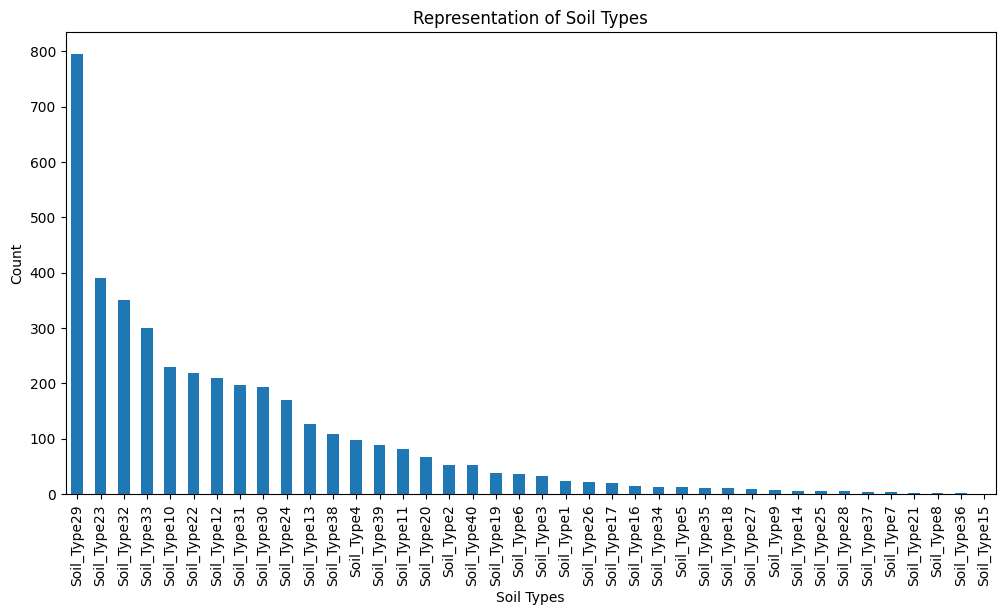

In [60]:
soil_columns = [f"Soil_Type{i}" for i in range(1, 41)]

soil_counts = df_random[soil_columns].sum().sort_values(ascending=False)

print("Soil Type counts:")
print(soil_counts)

plt.figure(figsize=(12,6))
soil_counts.plot(kind='bar')
plt.xlabel("Soil Types")
plt.ylabel("Count")
plt.title("Representation of Soil Types")
plt.show()

In [74]:
import os

# Path to Downloads folder
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads", "sampled_data.csv")

# Main columns to keep
columns_to_keep = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am',
    'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points','Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
    'Wilderness_Area4','Soil_Type29','Soil_Type23','Soil_Type32','Soil_Type33','Soil_Type10',
    'Soil_Type22','Soil_Type12','Soil_Type31','Soil_Type30','Soil_Type24',
    'Soil_Type13','Soil_Type38','Soil_Type4','Soil_Type39','Soil_Type11','Soil_Type20','Cover_Type'
]

df= data[columns_to_keep].sample(n=4000, random_state=42)

# Save to CSV in Downloads
df.to_csv(downloads_path, index=False)

print(f"Sampled data (selected + soil type columns) saved to: {downloads_path}")


Sampled data (selected + soil type columns) saved to: C:\Users\varsh\Downloads\sampled_data.csv


In [75]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type29                           0
Soil_Type23                           0
Soil_Type32                           0
Soil_Type33                           0
Soil_Type10                           0
Soil_Type22                           0
Soil_Type12                           0
Soil_Type31                           0
Soil_Type30                           0
Soil_Type24                           0
Soil_Type13                           0


In [76]:
df.duplicated().sum()

np.int64(0)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 250728 to 561199
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           4000 non-null   int64
 1   Aspect                              4000 non-null   int64
 2   Slope                               4000 non-null   int64
 3   Horizontal_Distance_To_Hydrology    4000 non-null   int64
 4   Vertical_Distance_To_Hydrology      4000 non-null   int64
 5   Horizontal_Distance_To_Roadways     4000 non-null   int64
 6   Hillshade_9am                       4000 non-null   int64
 7   Hillshade_Noon                      4000 non-null   int64
 8   Hillshade_3pm                       4000 non-null   int64
 9   Horizontal_Distance_To_Fire_Points  4000 non-null   int64
 10  Soil_Type29                         4000 non-null   int64
 11  Soil_Type23                         4000 non-null   int64
 12  Soil

In [77]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type30,Soil_Type24,Soil_Type13,Soil_Type38,Soil_Type4,Soil_Type39,Soil_Type11,Soil_Type20,Cover_Type
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2955.182250,156.424000,13.960000,268.68025,45.967500,2329.884500,212.124500,223.487250,142.848750,1996.56450,...,0.049250,0.048250,0.042250,0.031750,0.027250,0.024250,0.022000,0.020250,0.016500,2.042500
std,276.628682,112.756675,7.453207,210.67974,59.198168,1530.871935,27.136398,19.111872,37.677424,1336.43028,...,0.216417,0.214321,0.201184,0.175356,0.162831,0.153844,0.146702,0.140872,0.127404,1.392364
min,1920.000000,0.000000,0.000000,0.00000,-152.000000,0.000000,75.000000,98.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2805.750000,59.000000,9.000000,108.00000,7.000000,1114.000000,199.000000,213.000000,120.000000,1026.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2990.000000,127.000000,13.000000,218.00000,29.000000,1964.500000,218.000000,226.000000,143.000000,1729.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3156.000000,264.000000,18.000000,379.75000,66.000000,3259.750000,231.000000,237.000000,168.000000,2554.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3733.000000,359.000000,52.000000,1237.00000,536.000000,7078.000000,254.000000,254.000000,246.000000,6934.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [78]:
import pandas as pd

# Select only numeric columns (skip target)
numeric_cols = df.drop(columns=['Cover_Type']).columns

# IQR method to find outliers
outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower) | (df[col] > upper)][col].count()

# Print outliers per column
for col, count in outliers.items():
    print(f"{col}: {count} outliers")


Elevation: 103 outliers
Aspect: 0 outliers
Slope: 114 outliers
Horizontal_Distance_To_Hydrology: 100 outliers
Vertical_Distance_To_Hydrology: 244 outliers
Horizontal_Distance_To_Roadways: 9 outliers
Hillshade_9am: 143 outliers
Hillshade_Noon: 93 outliers
Hillshade_3pm: 53 outliers
Horizontal_Distance_To_Fire_Points: 219 outliers
Wilderness_Area1: 0 outliers
Wilderness_Area2: 196 outliers
Wilderness_Area3: 0 outliers
Wilderness_Area4: 251 outliers
Soil_Type29: 795 outliers
Soil_Type23: 390 outliers
Soil_Type32: 351 outliers
Soil_Type33: 300 outliers
Soil_Type10: 229 outliers
Soil_Type22: 219 outliers
Soil_Type12: 209 outliers
Soil_Type31: 197 outliers
Soil_Type30: 193 outliers
Soil_Type24: 169 outliers
Soil_Type13: 127 outliers
Soil_Type38: 109 outliers
Soil_Type4: 97 outliers
Soil_Type39: 88 outliers
Soil_Type11: 81 outliers
Soil_Type20: 66 outliers


In [79]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)


In [80]:
import pandas as pd

# Select only numeric columns (skip target)
numeric_cols = df.drop(columns=['Cover_Type']).columns

# IQR method to find outliers
outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower) | (df[col] > upper)][col].count()

# Print outliers per column
for col, count in outliers.items():
    print(f"{col}: {count} outliers")


Elevation: 0 outliers
Aspect: 0 outliers
Slope: 0 outliers
Horizontal_Distance_To_Hydrology: 0 outliers
Vertical_Distance_To_Hydrology: 0 outliers
Horizontal_Distance_To_Roadways: 0 outliers
Hillshade_9am: 0 outliers
Hillshade_Noon: 0 outliers
Hillshade_3pm: 0 outliers
Horizontal_Distance_To_Fire_Points: 0 outliers
Wilderness_Area1: 0 outliers
Wilderness_Area2: 0 outliers
Wilderness_Area3: 0 outliers
Wilderness_Area4: 0 outliers
Soil_Type29: 0 outliers
Soil_Type23: 0 outliers
Soil_Type32: 0 outliers
Soil_Type33: 0 outliers
Soil_Type10: 0 outliers
Soil_Type22: 0 outliers
Soil_Type12: 0 outliers
Soil_Type31: 0 outliers
Soil_Type30: 0 outliers
Soil_Type24: 0 outliers
Soil_Type13: 0 outliers
Soil_Type38: 0 outliers
Soil_Type4: 0 outliers
Soil_Type39: 0 outliers
Soil_Type11: 0 outliers
Soil_Type20: 0 outliers


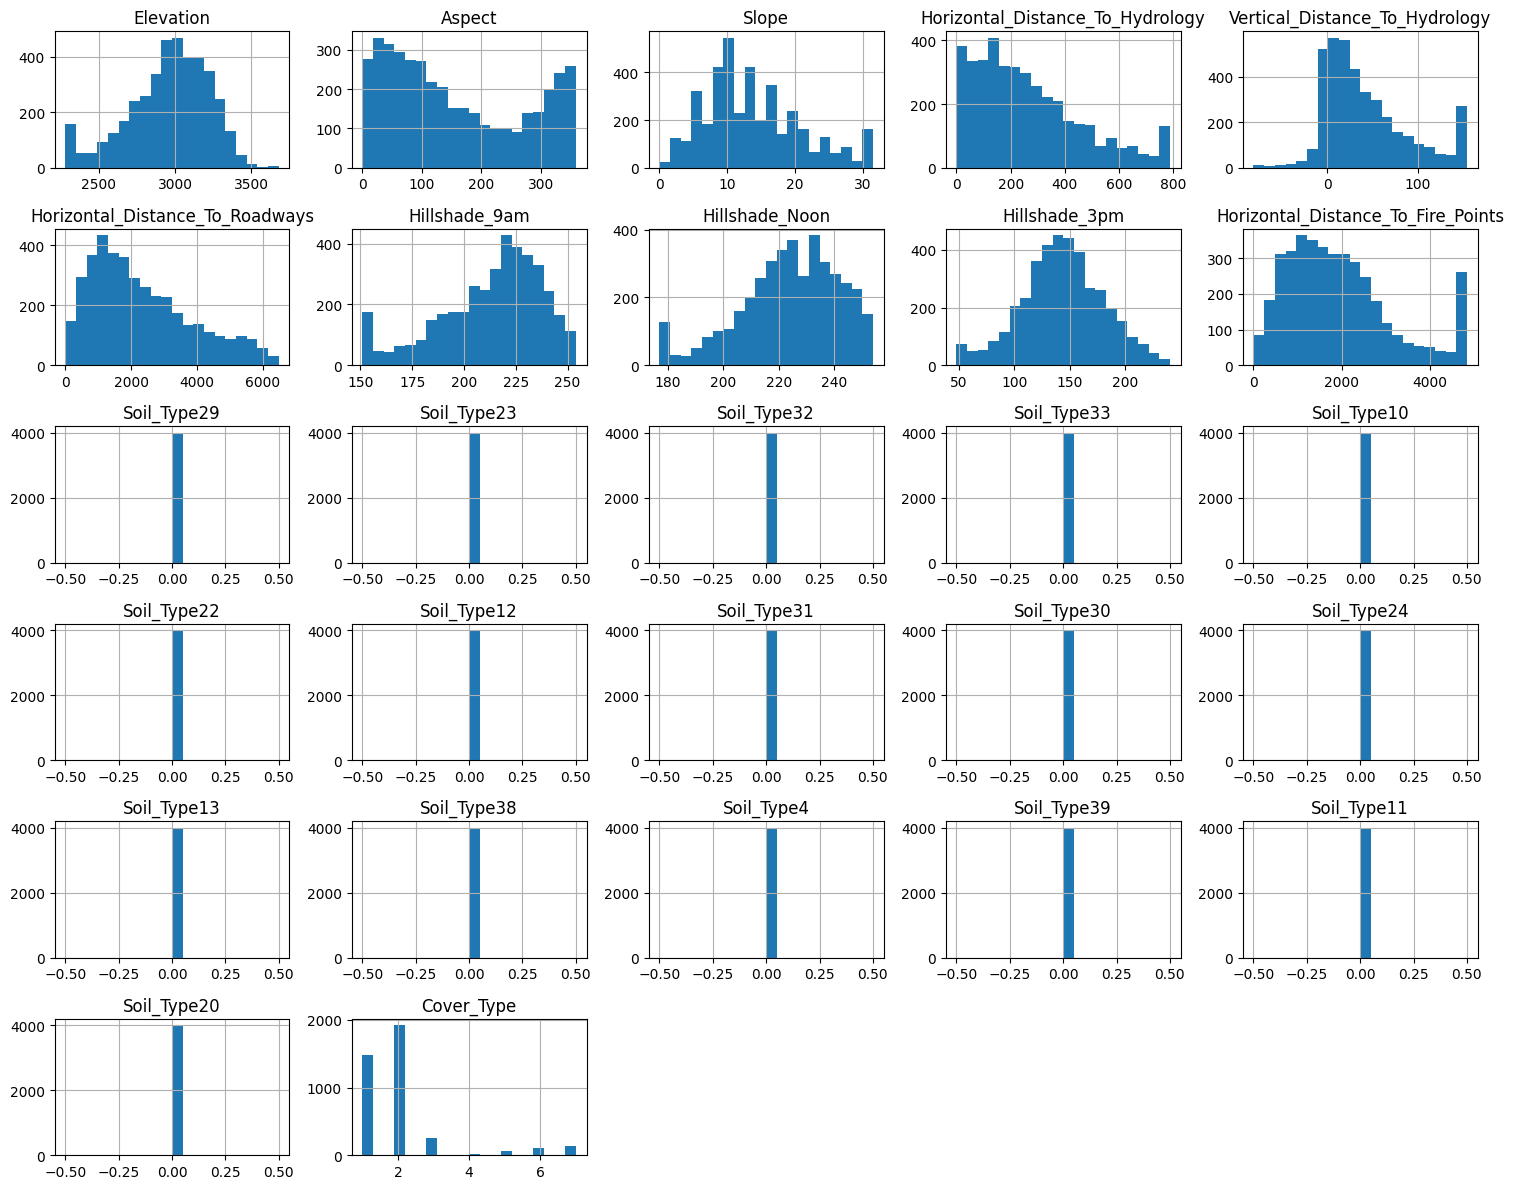

In [70]:
df.hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()

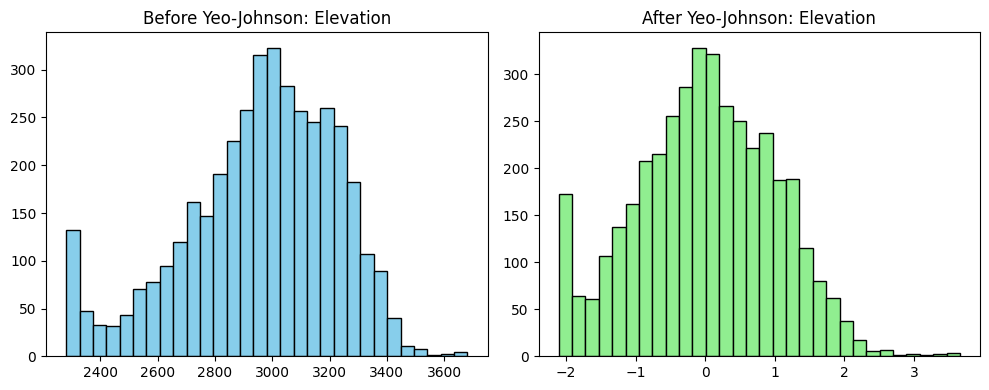

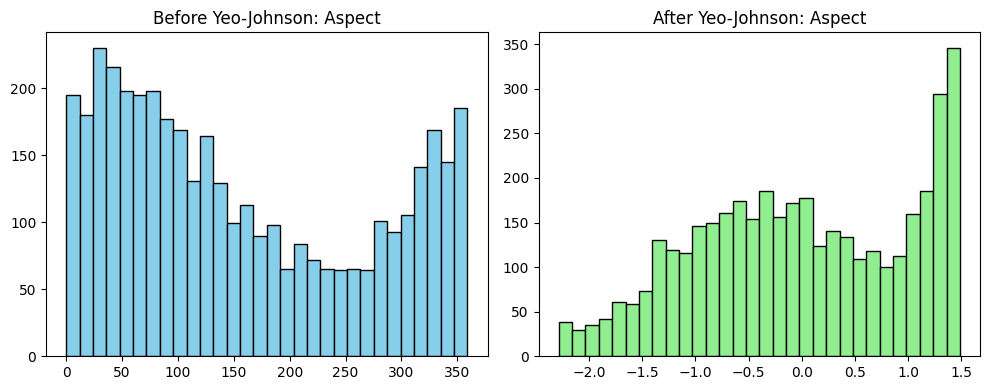

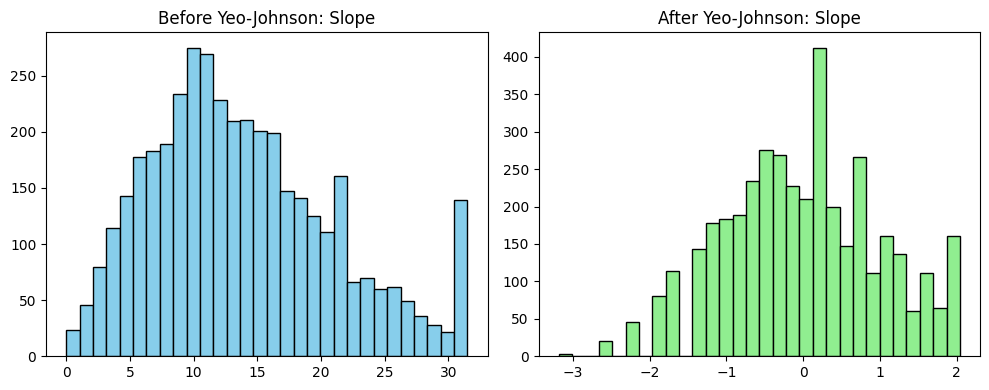

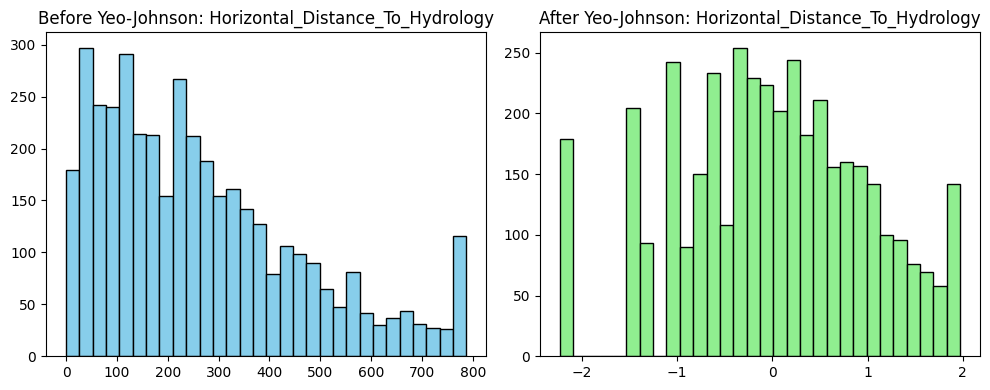

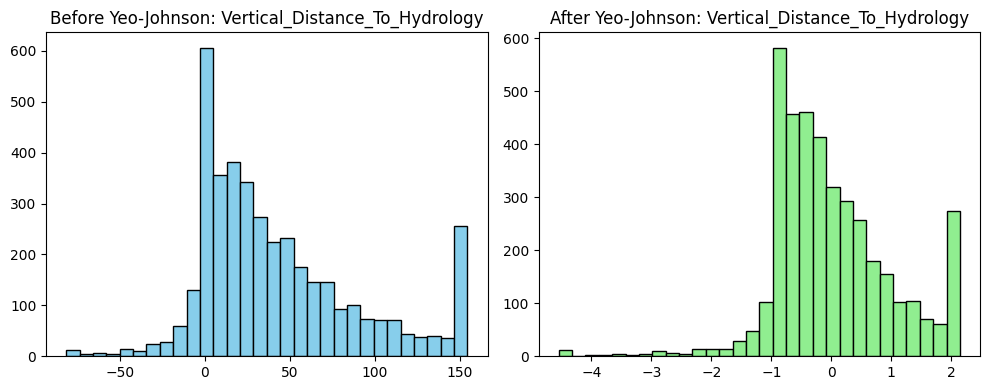

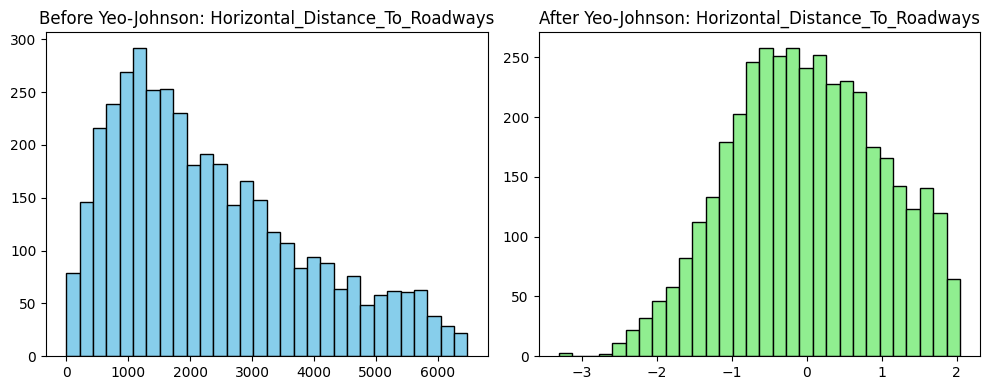

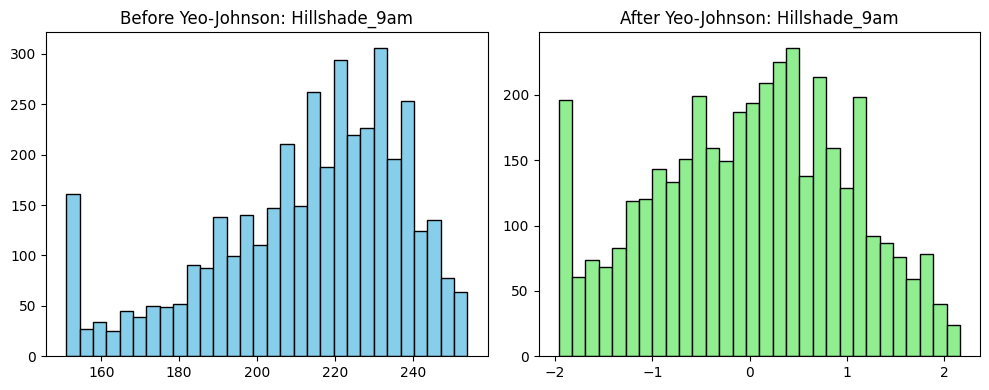

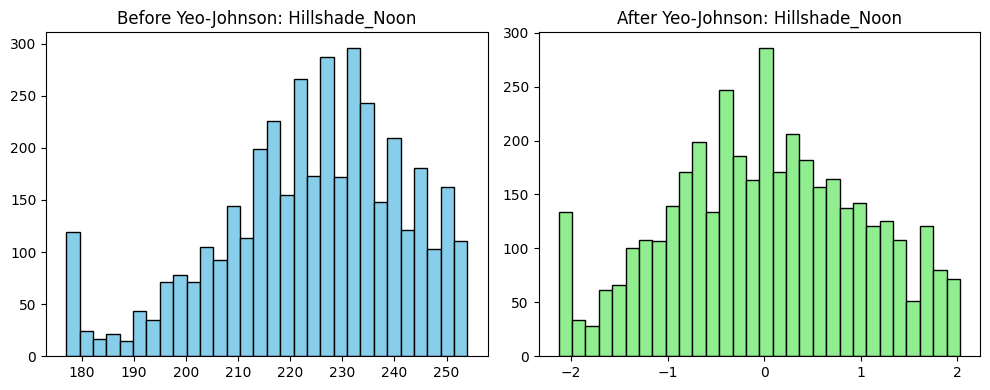

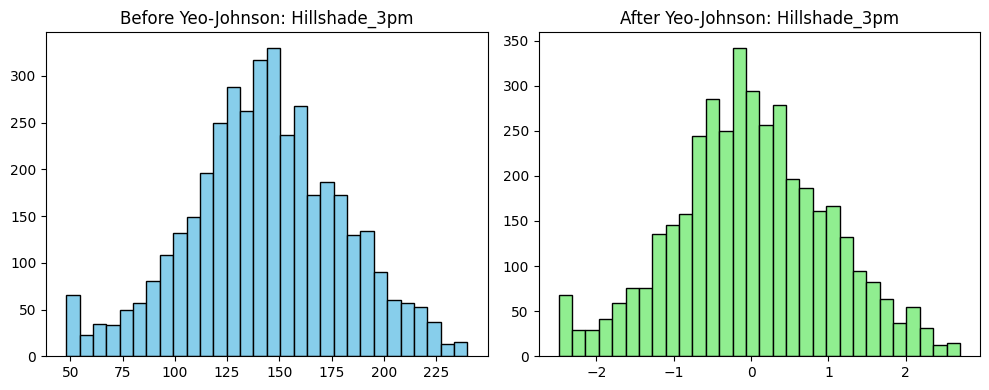

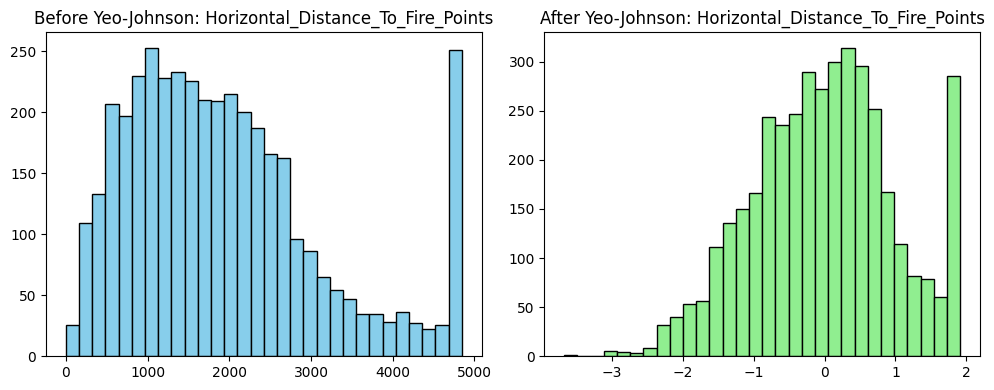

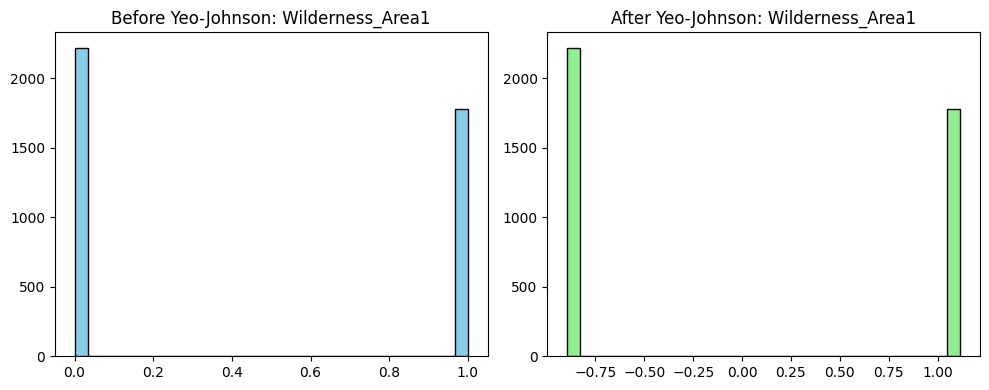

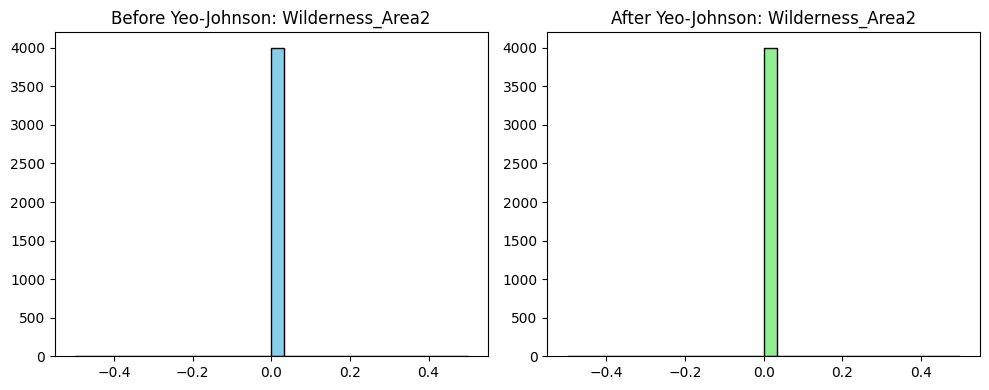

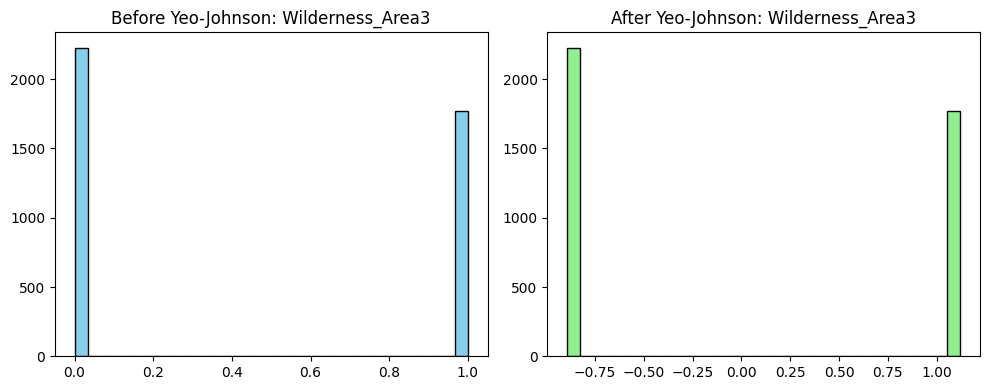

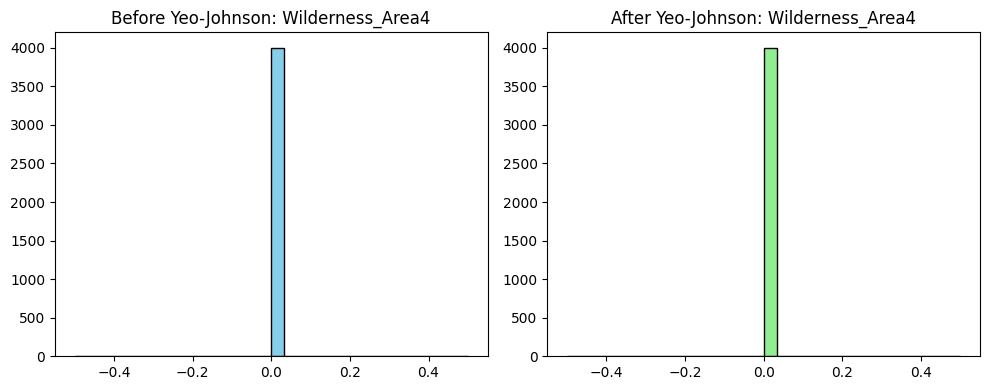

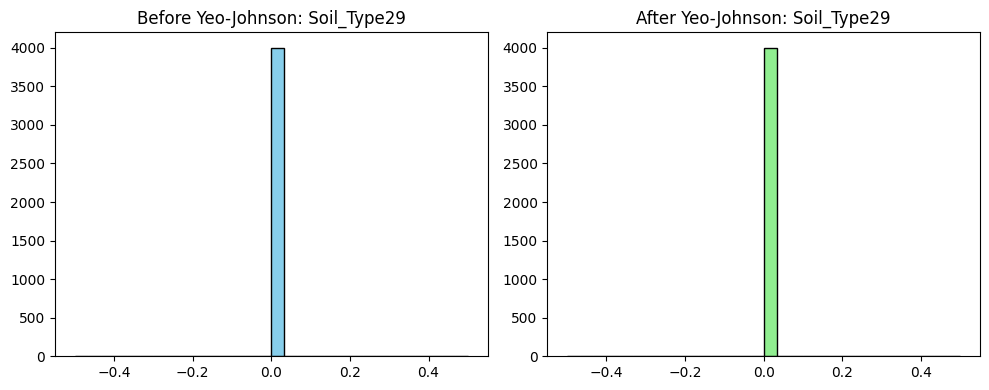

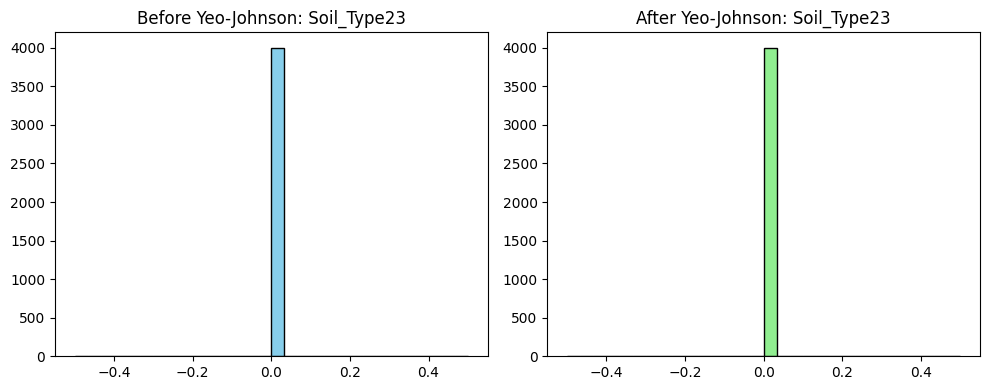

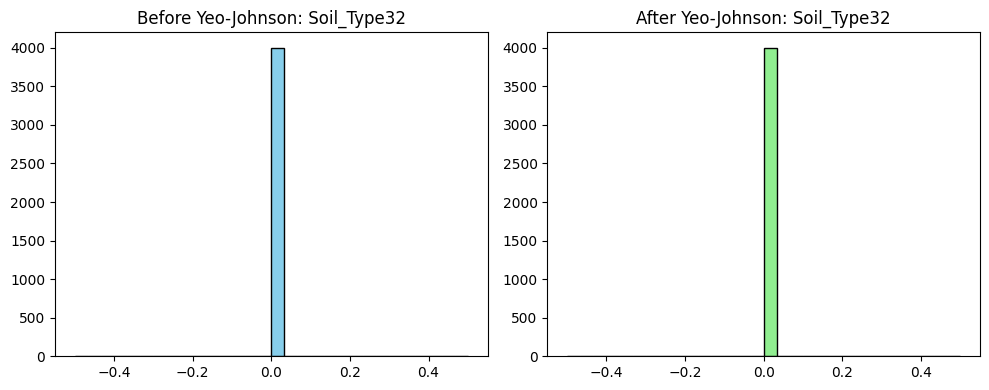

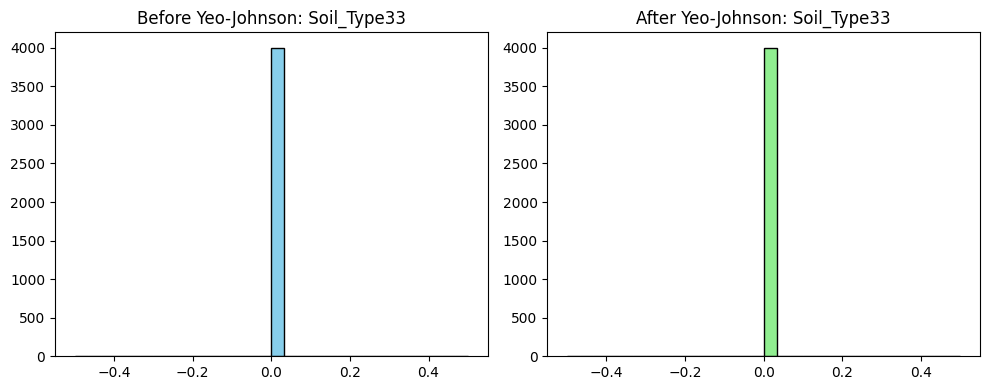

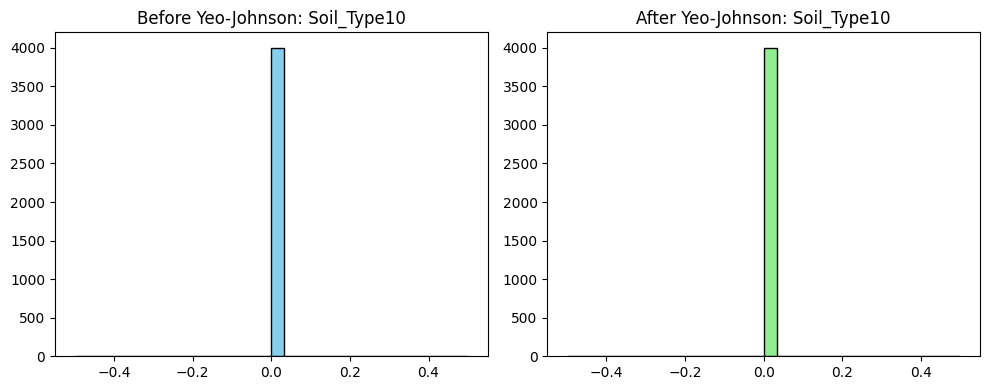

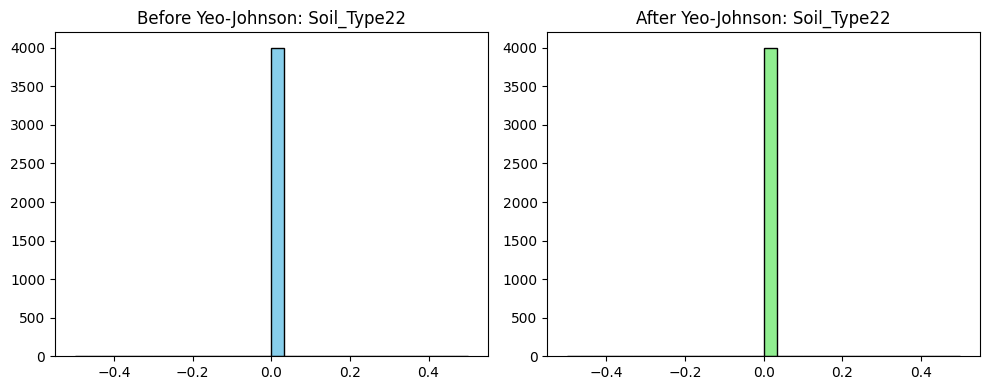

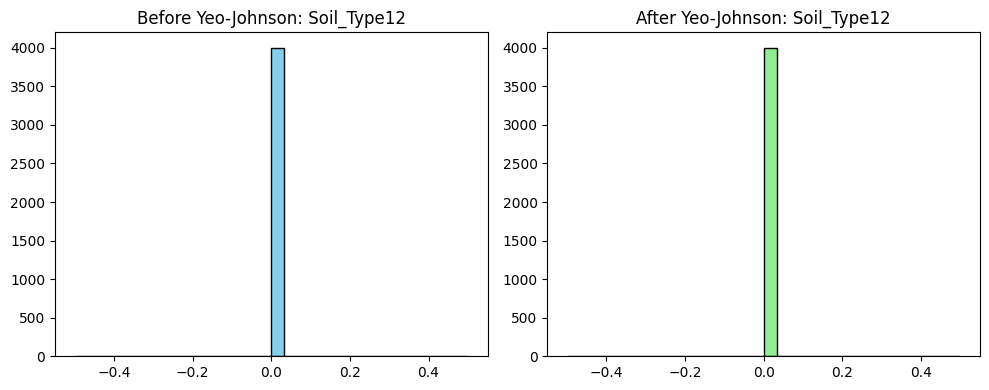

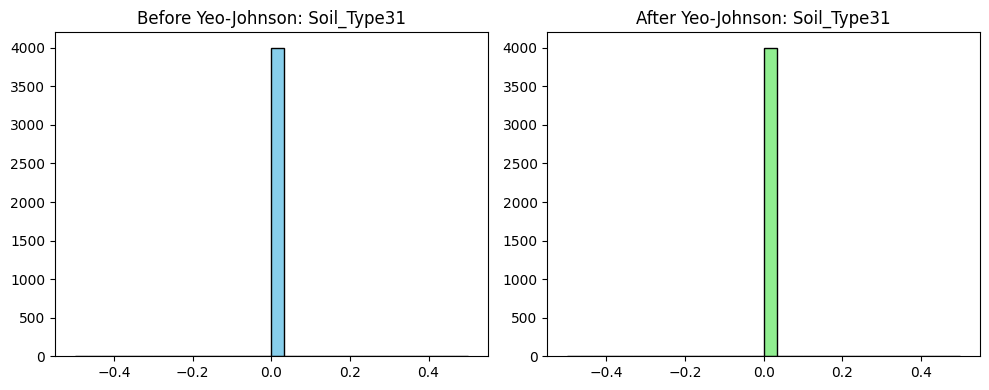

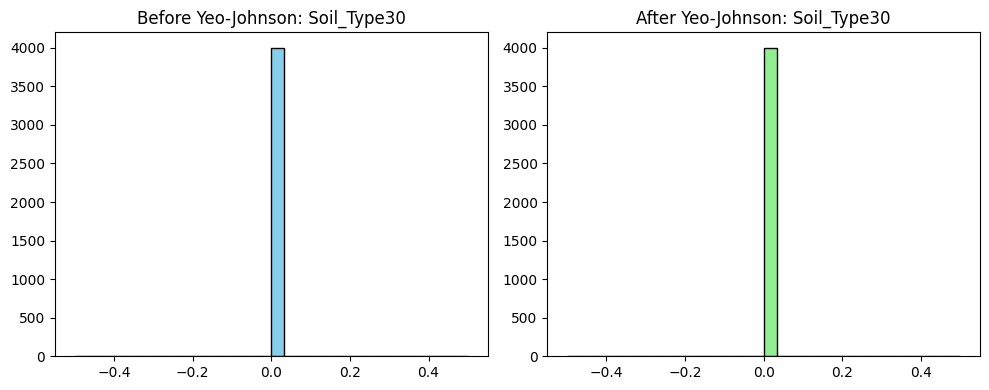

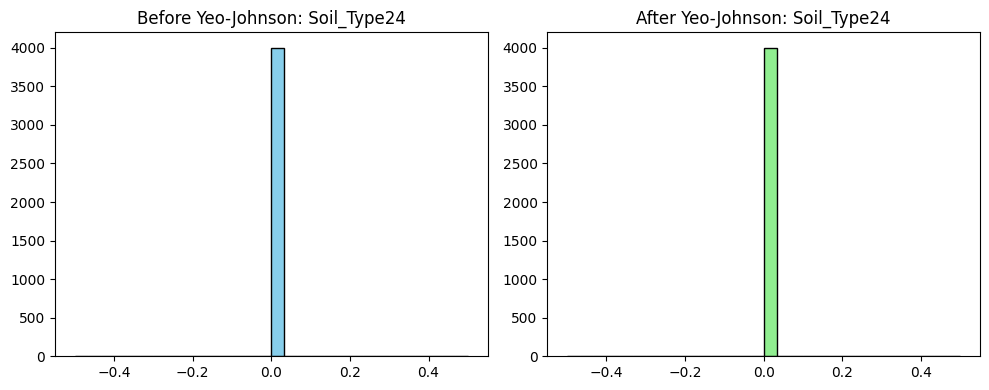

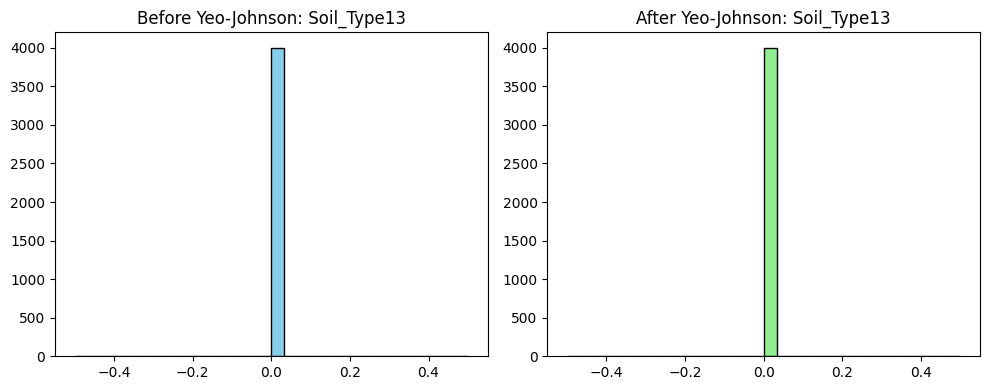

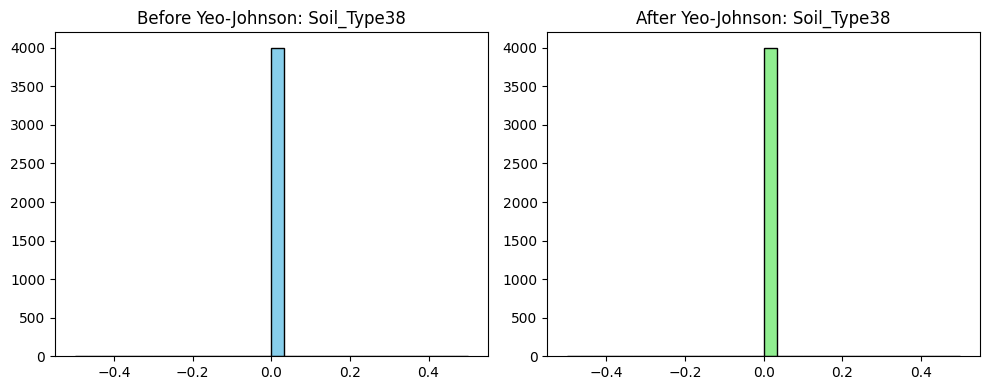

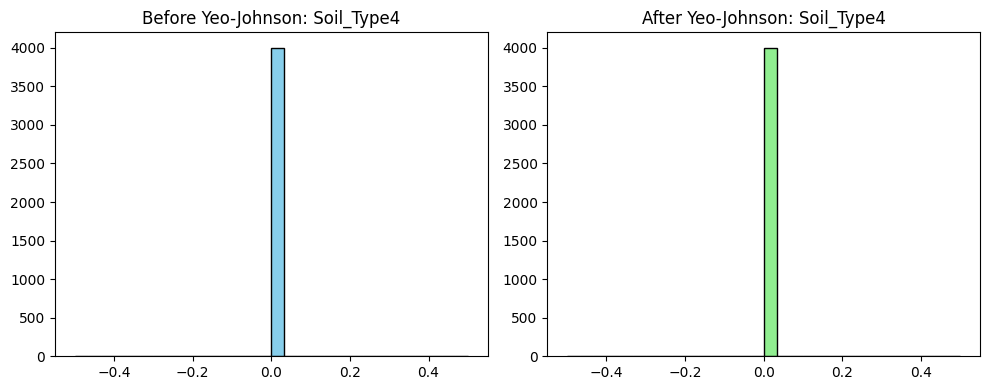

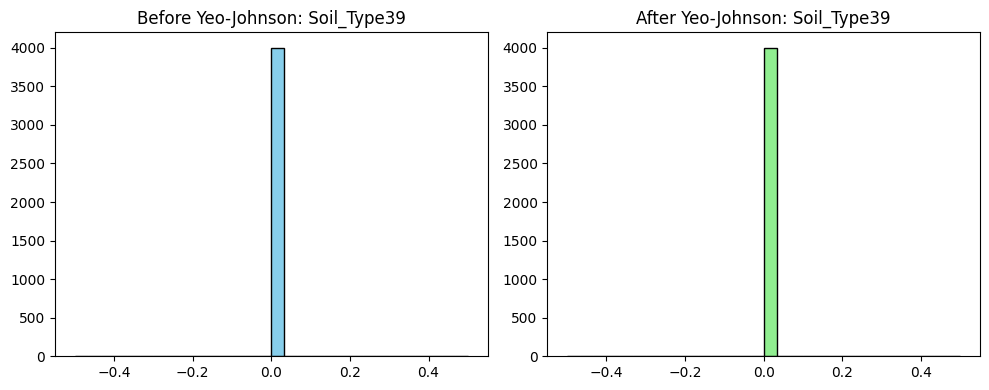

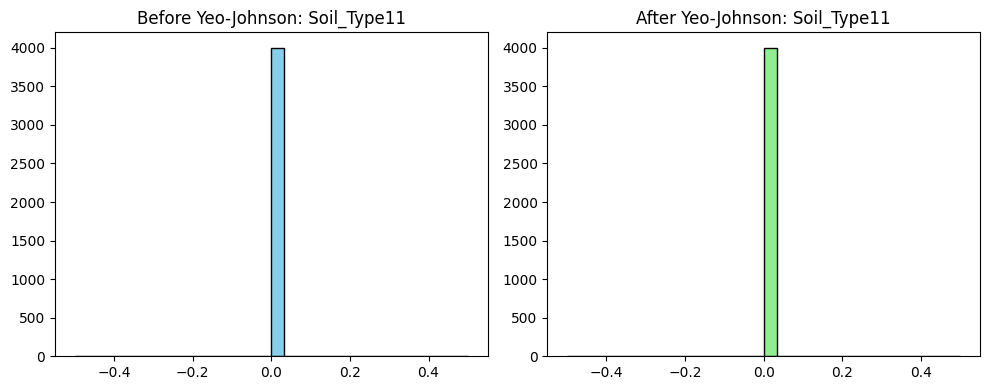

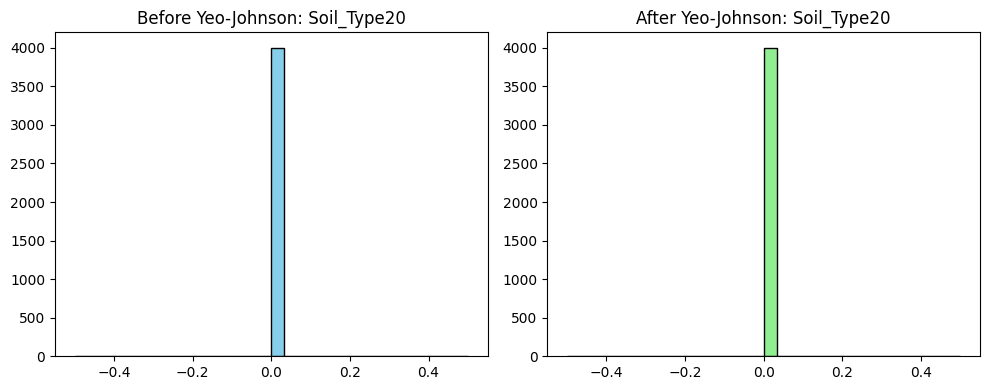

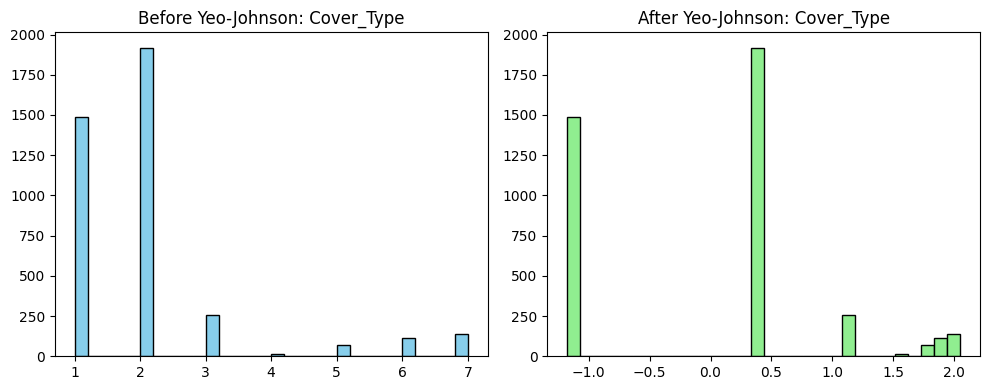

In [ ]:
from sklearn.preprocessing import PowerTransformer

numeric_cols = df.select_dtypes(include=['int64']).columns

pt = PowerTransformer(method='yeo-johnson')
df_transformed = df.copy()
df_transformed[numeric_cols] = pt.fit_transform(df[numeric_cols])

for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    axes[0].hist(df[col], bins=30, color="skyblue", edgecolor="black")
    axes[0].set_title(f"Before Yeo-Johnson: {col}")
    
    axes[1].hist(df_transformed[col], bins=30, color="lightgreen", edgecolor="black")
    axes[1].set_title(f"After Yeo-Johnson: {col}")
    
    plt.tight_layout()
    plt.show()


In [91]:
df_transformed.head() 

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type30,Soil_Type24,Soil_Type13,Soil_Type38,Soil_Type4,Soil_Type39,Soil_Type11,Soil_Type20,Cover_Type
250728,1.687452,0.589679,1.631825,1.806744,1.608049,1.001223,-0.962042,1.858988,1.002957,0.443532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.178665
246788,-0.918440,-0.009395,-0.974681,-0.038379,-0.835376,-0.754715,0.723470,0.651250,-0.178869,-0.840955,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.419153
407714,-1.398300,-1.354497,-0.603870,-0.096689,-0.277704,-0.883565,-0.026261,-0.226105,-0.043178,0.384047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.419153
25713,-0.609625,-0.634273,0.024478,0.843732,0.011993,0.713332,0.834107,-0.659873,-0.902483,1.913885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.419153
21820,-1.515517,-0.456749,-1.404712,-0.591759,-0.633162,-0.744804,0.509943,0.319779,-0.124652,1.913885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.419153


In [ ]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"].astype(int)
y = y - y.min() 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
 
}


results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    try:
        y_prob = model.predict_proba(X_test)
        if len(set(y)) == 2: 
            auc = roc_auc_score(y_test, y_prob[:, 1])
        else:  
            auc = roc_auc_score(y_test, y_prob, multi_class="ovr")
    except:
        auc = None
    
    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(report["weighted avg"]["precision"], 4),
        "Recall": round(report["weighted avg"]["recall"], 4),
        "F1-Score": round(report["weighted avg"]["f1-score"], 4),
        "ROC-AUC": auc
    })

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision  Recall  F1-Score   ROC-AUC
0  Logistic Regression    0.6950     0.6694  0.6950    0.6786  0.908077
1                  KNN    0.6713     0.6618  0.6713    0.6558  0.813908
2                  SVM    0.7175     0.7155  0.7175    0.6959  0.909183
3        Decision Tree    0.6625     0.6632  0.6625    0.6618  0.693515
4        Random Forest    0.7400     0.7219  0.7400    0.7228  0.914824
5    Gradient Boosting    0.6963     0.6904  0.6963    0.6893  0.867272
6             AdaBoost    0.6100     0.5992  0.6100    0.5985  0.836825
7              XGBoost    0.7163     0.7131  0.7163    0.7107  0.916997


In [ ]:
X = df_transformed.drop("Cover_Type", axis=1)
y = df_transformed["Cover_Type"].astype(int)
y = y - y.min() 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
 
}


results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    try:
        y_prob = model.predict_proba(X_test)
        if len(set(y)) == 2:  
            auc = roc_auc_score(y_test, y_prob[:, 1])
        else: 
            auc = roc_auc_score(y_test, y_prob, multi_class="ovr")
    except:
        auc = None
    
    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(report["weighted avg"]["precision"], 4),
        "Recall": round(report["weighted avg"]["recall"], 4),
        "F1-Score": round(report["weighted avg"]["f1-score"], 4),
        "ROC-AUC": auc
    })

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision  Recall  F1-Score   ROC-AUC
0  Logistic Regression    0.7175     0.7208  0.7175    0.7158  0.897977
1                  KNN    0.6900     0.6950  0.6900    0.6885  0.833181
2                  SVM    0.7488     0.7518  0.7488    0.7461  0.899572
3        Decision Tree    0.6637     0.6654  0.6637    0.6641  0.731982
4        Random Forest    0.7462     0.7469  0.7462    0.7441  0.909813
5    Gradient Boosting    0.7350     0.7372  0.7350    0.7349  0.905970
6             AdaBoost    0.5988     0.5842  0.5988    0.5896  0.799267
7              XGBoost    0.7388     0.7403  0.7388    0.7386  0.914566


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd
import numpy as np


X = df_transformed.drop("Cover_Type", axis=1)
y = df_transformed["Cover_Type"].astype(int)
y = y - y.min() 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


rf = RandomForestClassifier(
    n_estimators=200,     
    max_depth=None,       
    random_state=42,
    class_weight="balanced"   
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

try:
    y_prob = rf.predict_proba(X_test)
    if len(np.unique(y)) == 2: 
        auc = roc_auc_score(y_test, y_prob[:, 1])
    else: 
        auc = roc_auc_score(y_test, y_prob, multi_class="ovr")
except:
    auc = None

results = {
    "Model": "Random Forest",
    "Accuracy": round(acc, 4),
    "Precision": round(report["weighted avg"]["precision"], 4),
    "Recall": round(report["weighted avg"]["recall"], 4),
    "F1-Score": round(report["weighted avg"]["f1-score"], 4),
    "ROC-AUC": auc
}

results_df = pd.DataFrame([results])
print(results_df)


           Model  Accuracy  Precision  Recall  F1-Score   ROC-AUC
0  Random Forest    0.7562      0.767  0.7562    0.7527  0.931106


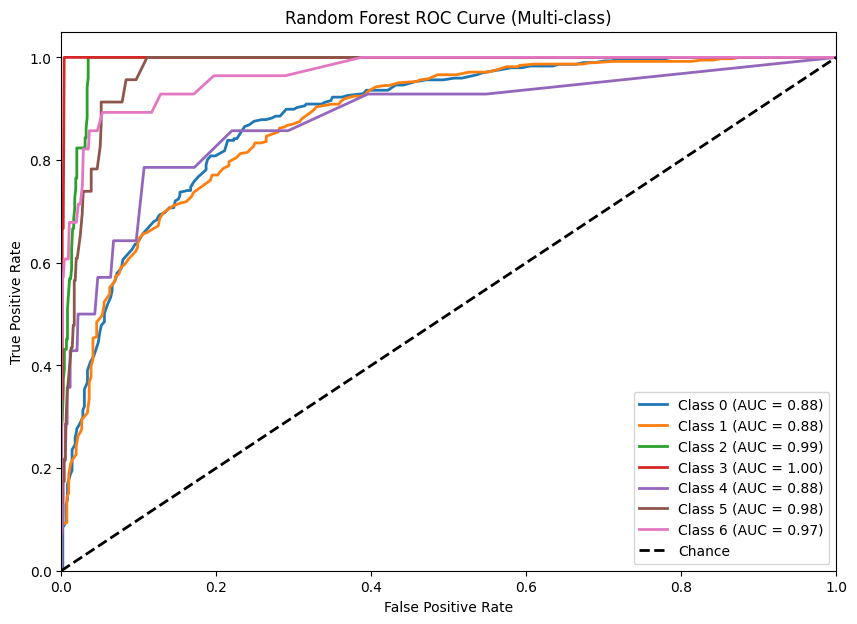

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_prob = rf.predict_proba(X_test) 

n_classes = y_prob.shape[1]

plt.figure(figsize=(10, 7))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2, label="Chance")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve (Multi-class)")
plt.legend(loc="lower right")
plt.show()


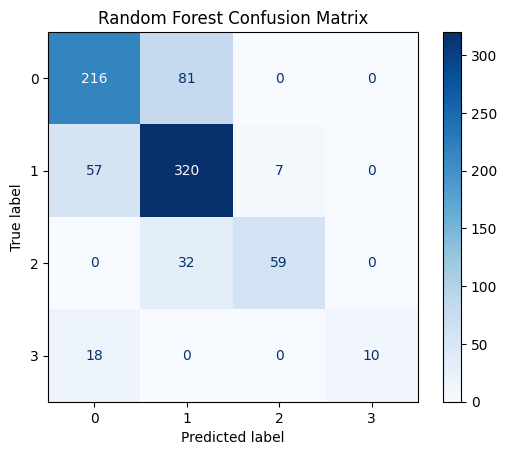

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test set
y_pred = rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Random Forest Confusion Matrix")
plt.show()


In [124]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type29', 'Soil_Type23', 'Soil_Type32', 'Soil_Type33',
       'Soil_Type10', 'Soil_Type22', 'Soil_Type12', 'Soil_Type31',
       'Soil_Type30', 'Soil_Type24', 'Soil_Type13', 'Soil_Type38',
       'Soil_Type4', 'Soil_Type39', 'Soil_Type11', 'Soil_Type20',
       'Cover_Type'],
      dtype='object')

In [122]:
sample_input = {
    'Elevation': 2990,
    'Aspect': 127,
    'Slope': 13,
    'Horizontal_Distance_To_Hydrology': 218,
    'Vertical_Distance_To_Hydrology': 29,
    'Horizontal_Distance_To_Roadways': 1964,
    'Hillshade_9am': 218,
    'Hillshade_Noon': 226,
    'Hillshade_3pm': 143,
    'Horizontal_Distance_To_Fire_Points': 1729,
    'Wilderness_Area1': 0,
    'Wilderness_Area2': 0,
    'Wilderness_Area3': 0,
    'Wilderness_Area4': 0,
    'Soil_Type29': 0,
    'Soil_Type23': 0,
    'Soil_Type32': 0,
    'Soil_Type33': 0,
    'Soil_Type10': 0,
    'Soil_Type22': 0,
    'Soil_Type12': 0,
    'Soil_Type31': 0,
    'Soil_Type30': 0,
    'Soil_Type24': 0,
    'Soil_Type13': 0,
    'Soil_Type38': 0,
    'Soil_Type4': 0,
    'Soil_Type39': 0,
    'Soil_Type11': 0,
    'Soil_Type20': 0,
}

sample_df = pd.DataFrame([sample_input])

print(sample_df)
pred = rf.predict(sample_df)
print("Predicted Cover Type:", pred[0])


   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2990     127     13                               218   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              29                             1964   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            218             226            143   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type12  Soil_Type31  \
0                                1729  ...            0            0   

   Soil_Type30  Soil_Type24  Soil_Type13  Soil_Type38  Soil_Type4  \
0            0            0            0            0           0   

   Soil_Type39  Soil_Type11  Soil_Type20  
0            0            0            0  

[1 rows x 30 columns]
Predicted Cover Type: 1


In [126]:
import pickle
with open('best_model.pkl','wb') as fp:
  pickle.dump(model,fp)


In [128]:
feature_list = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type29', 'Soil_Type23', 'Soil_Type32', 'Soil_Type33',
       'Soil_Type10', 'Soil_Type22', 'Soil_Type12', 'Soil_Type31',
       'Soil_Type30', 'Soil_Type24', 'Soil_Type13', 'Soil_Type38',
       'Soil_Type4', 'Soil_Type39', 'Soil_Type11', 'Soil_Type20' ]

with open('features_list.pkl','wb') as fp:
  pickle.dump(feature_list,fp)